# HW3: Problem 3 Classification Comparison with Synthetic Data


* Write a jupyter notebook. 
* It is essential that you include markdown cells explaining what you are doing at each step.

* You are going to compare the classification algorithms you have learned:

1.  Naive Bayes Classification
2.  Logistic Regression
3.  Quadradic Discriminant Analysis
4.  SVM using radial basis functions (RBF)
5.  Decision Tree
6.  KNN with K = 1

So make sure you run each of these algorithms on the data sets you will create to test.

* The goal is to create 4 synthetic data examples with 2D input data, 2 classes, to use to compare the algorithms. 
* You should use a combination of the following 3 synthetic functions to make your examples:
-   [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
-   [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
-   [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

* You may use a combination of the above in the same example. For example, one class could come from a moon and the other class from a circle in the same example. You could also make one class is a combination of a moon bending oneway and a moon bending the other if that worked better for your example.
* Your examples should be such that:

1.  One of the four examples will be two well-separated blob classes. This example show that all the classifiers work pretty well (near-perfect or perfect classification)
2.  In the two of the data examples, the linear classifier (logistic regression) should do more poorly (both in training and test evaluation) than the others
3.  In the second example the quadratic should do very well (both in training and testing) but the linear classifier should do poorly. The SVM, Decision Tree, and KNN should also do better than the Logistic Regressioon
4.  In the third example you should be able to construct an example where the decision tree and KNN both overfit so the training error is small but the testing error is large, and linear regression does better
5.  The fourth example should be such that SVM and KNN do better than the others (in testing error)

In your evaluations, you should always split the data set into a training and test set using [sklearn.model_selection.train_test_split ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) and also create a report using [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

There should be both an evaluation for training which means fit on training test on training (evaluation of fit) and testing which means fit on training but test on the testing data with the training fit!
Never, ever, fit on training data!!!

Since you are working with 2D data you should also create a set of visualized comparisons like those here:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">Classifier comparison</span>
<span style="margin-top: 0.5em; display: block;">A comparison of a
several classifiers in scikit-learn on synthetic datasets. The point of
this example is to illustrate the nature of decision boundaries of
different classifiers. This should be ta...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>

You can use these visualizations and comparisons as inspiration but you should develop your own. Don\'t forget to see your random numbers! For some more idea on how to generate the synthetic data please read these examples too:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">2.3. Clustering</span> <span
style="margin-top: 0.5em; display: block;">Clustering of unlabeled data
can be performed with the module sklearn.cluster. Each clustering
algorithm comes in two variants: a class, that implements the fit method
to learn the clusters on trai...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>


### Libraries

In [1]:
#libraries 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#seed
seed = 99

In [21]:
#silencing future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Dataset Creation

Creating four datasets (two-dimensional, two classes) using sklearn.datasets.make_blobs, sklearn.datasets.make_circles, and sklearn.datasets.make_moons, such that each dataset highlights situations where specific classification models perform well. 

* Dataset 1: All classification models should perform well.
* Dataset 2: Quadratic-based models should perform well.
* Dataset 3: Decision Tree and KNN overfit, but logistic regression performs well.
* Dataset 4: SVM and KNN perform better than the others. 

In [2]:
#create dataset 1 using make_blobs
x1, y1 = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=seed)

In [3]:
#create dataset 2 using make_circles
x2,y2 = make_circles(n_samples=2000, noise=.15, factor=.1, random_state=seed)
#boolean mask such that feature 2 of x2 is greater than 0
mask = x2[:,1]>0
#apply boolean mask to filter
x2=x2[mask]
y2=y2[mask]

In [4]:
#create dataset 3 with make_blobs, defining centers of blobs, such that the decision boundary is linear, but is not completely separable  
x3, y3 = make_blobs(n_samples=[250,250,250,250], n_features=2, centers=[[1.2,1.5],[.5,1.5],[1.2,1],[.5,1]], cluster_std=.2,random_state=seed)
#using boolean masks to reduce to only 2 classes 
y3[(y3==1)]=0
y3[(y3!=0)]=1

In [5]:
#create dataset 4 using a combination of make_moons and make_blobs 
x4_1, y4_1 = make_moons(1000, noise=.2, random_state=seed)
x4_2, y4_2 = make_blobs(n_samples=[500,500], n_features=2, centers=[[3,.5],[-2,0]],cluster_std=.2)
#vertically stacking the x data
x4 = np.vstack((x4_1,x4_2))
#horizontally stacking the y data 
y4 = np.hstack((y4_1,y4_2))

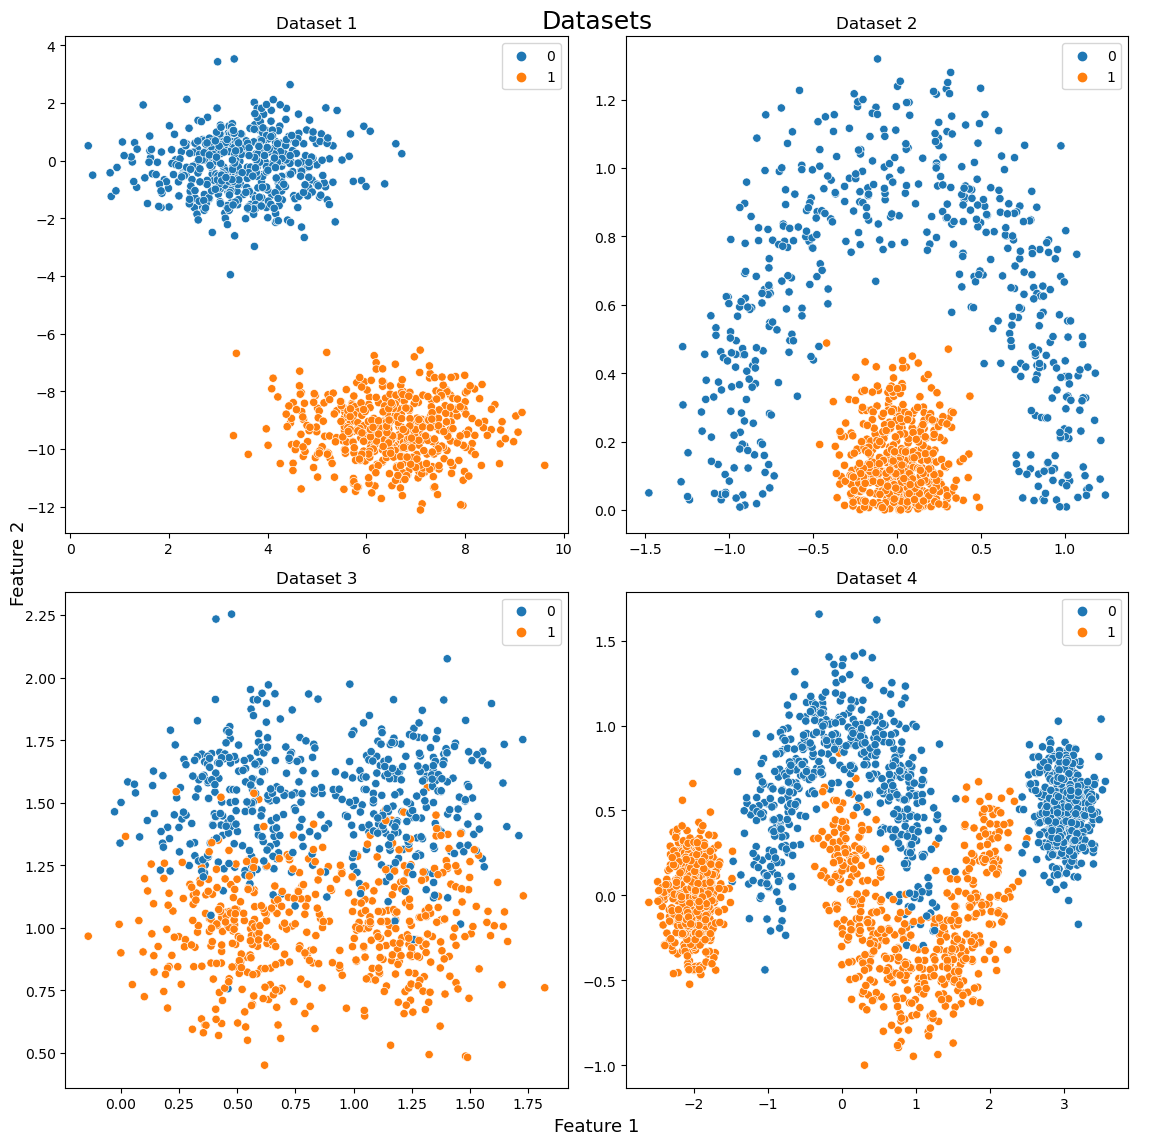

In [6]:
#visualization of the created datasets 
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax = ax.ravel()

#seaborn scatterplots 
sns.scatterplot(x=x1[:,0],y=x1[:,1], hue=y1, ax=ax[0]).set_title('Dataset 1')
sns.scatterplot(x=x2[:,0],y=x2[:,1], hue=y2, ax=ax[1]).set_title('Dataset 2')
sns.scatterplot(x=x3[:,0],y=x3[:,1], hue=y3, ax=ax[2]).set_title('Dataset 3')
sns.scatterplot(x=x4[:,0],y=x4[:,1], hue=y4, ax=ax[3]).set_title('Dataset 4')

#adding title, labels, etc. 
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Feature 1',fontsize=13)
plt.ylabel('Feature 2',fontsize=13)
plt.title('Datasets',fontsize=18)

plt.tight_layout()

Dataset 1 contains two well separated blobs. It is expected that all models should perform well at classification, due to the decision boundary being easily found, whether it is linear, quadratic, etc. 

Dataset 2 contains two classes where the decision boundary would be a quadratic. Linear classifiers like logistic regression should perform poorly. 

Dataset 3 contains two classes where there is not a clear decision boundary that separates the two. It is observed that a linear boundary could separate the majority of the data points correctly, but due to the overlapping nature of the data, other methods like KNN and decision tree should suffer from overfitting. 

Dataset 4 contains two classes that are not linearly separable. The boundary separating the two is more complex, leading to models like SVM with RBF kernal and KNN to perform better. 

### Modeling

First, the datasets will be split into training and testing data. The training data will be used to train the models, and the testing data will be used to evaluate the final model performance. sklearn.model_selection.train_test_split will be used for train/test splitting. 

In [7]:
#train/test split, dataset 1
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3, random_state=seed)

#train/test split, dataset 2
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3, random_state=seed)

#train/test split, dataset 3
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.3, random_state=seed)

#train/test split, dataset 4
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.3, random_state=seed)


Second, the data will be standardized, due to certain models being affected by feature scaling. The models affected are logistic regression, support vector machine, and KNN. The results of the other models will not be affected. The standard scaler is fit on the training data, and then both the training and testing data will be transformed. This sequence of steps is to ensure model fitting is not affected by the test data in any fashion. 

In [8]:
#function to perform standard scaler 
def std_sc(train,test):
    scaler = StandardScaler()
    return scaler.fit_transform(train), scaler.transform(test)
    
#perform standard scaler
x1_train, x1_test = std_sc(x1_train,x1_test)
x2_train, x2_test = std_sc(x2_train,x2_test)
x3_train, x3_test = std_sc(x3_train,x3_test)
x4_train, x4_test = std_sc(x4_train,x4_test)

Third, the models under investigation are stored in a dictionary, and a function to perfrom model training is defined. The model is fit on the training data, such that we have our input features in x_train and class label in y_train. The models will use default parameters, with SVM using the RBF kernel and number of neighbors equaling 1 for this investigation. 

In [9]:
#initializing and storing models in a dictionary for ease 
models = {'naive_bayes':GaussianNB(),
          'logistic':LogisticRegression(random_state=seed),
          'qda':QuadraticDiscriminantAnalysis(),
          'svm':SVC(kernel='rbf'),
          'tree':DecisionTreeClassifier(random_state=seed),
          'knn':KNeighborsClassifier(n_neighbors=1)
          }

In [15]:
#function for model training 
def model_training(models,x,y):
    trained_models = {}
    for name, model in models.items():
        trained_models[name]=model.fit(x,y)
    return trained_models

In [13]:
#training models 
trained_models = model_training(models,x1_train, y1_train)

In [22]:
#function for returning y_pred for trained_models 
def predictions(models,x):
    predictions = {}
    for name, model in models.items():
        predictions[name]=model.predict(x)
    return predictions

In [23]:
y_preds_train = predictions(trained_models,x1_train)
y_preds_test = predictions(trained_models,x1_test)

In [24]:
#function for returning the classification report for trained_models predictions  
def class_reports(predictions,y_true):
    reports = {}
    for name,y_pred in predictions.items():
        reports[name] = classification_report(y_true,y_pred)
    return reports

In [25]:
classification_reports = class_reports(y_preds_train, y1_train)

In [32]:
for name,report in classification_reports.items():
    print(name)
    print(report)

naive_bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       163

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

logistic
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       163

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

qda
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       163

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00      

In [30]:
classification_reports = class_reports(y_preds_test, y1_test)

In [31]:
for report in classification_reports.values():
    print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       163

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       163

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       163

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

              preci